In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import yellowbrick
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [58]:
df_churn = pd.read_csv('Churn_Modelling.csv')
df_churn.head().transpose()

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0,83807.9,159661,0,125511
NumOfProducts,1,1,3,2,1


In [59]:
#one hot encode variable
geography=pd.get_dummies(df_churn["Geography"])
gender=pd.get_dummies(df_churn['Gender'],drop_first=True)

#Concatenate and Drop geography and gender
## Concatenate the Data Frames

df_churn =pd.concat([df_churn,geography,gender],axis=1)

## Drop Unnecessary columns
df_churn=df_churn.drop(['RowNumber', 'CustomerId','Surname','Geography','Gender'],axis=1)

df_churn.head().transpose()

,0,1,2,3,4
CreditScore,619.00,608.00,502.00,699.00,850.00
Age,42.00,41.00,42.00,39.00,43.00
Tenure,2.00,1.00,8.00,1.00,2.00
Balance,0.00,83807.86,159660.80,0.00,125510.82
NumOfProducts,1.00,1.00,3.00,2.00,1.00
HasCrCard,1.00,0.00,1.00,0.00,1.00
IsActiveMember,1.00,1.00,0.00,0.00,1.00
EstimatedSalary,101348.88,112542.58,113931.57,93826.63,79084.10
Exited,1.00,0.00,1.00,0.00,0.00
France,1.00,0.00,1.00,1.00,0.00


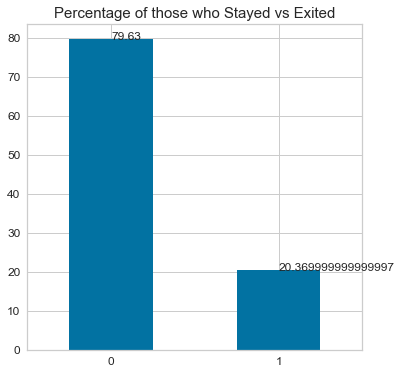

In [60]:
def_cnt = (df_churn.Exited.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Percentage of those who Stayed vs Exited", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

In [61]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 25)

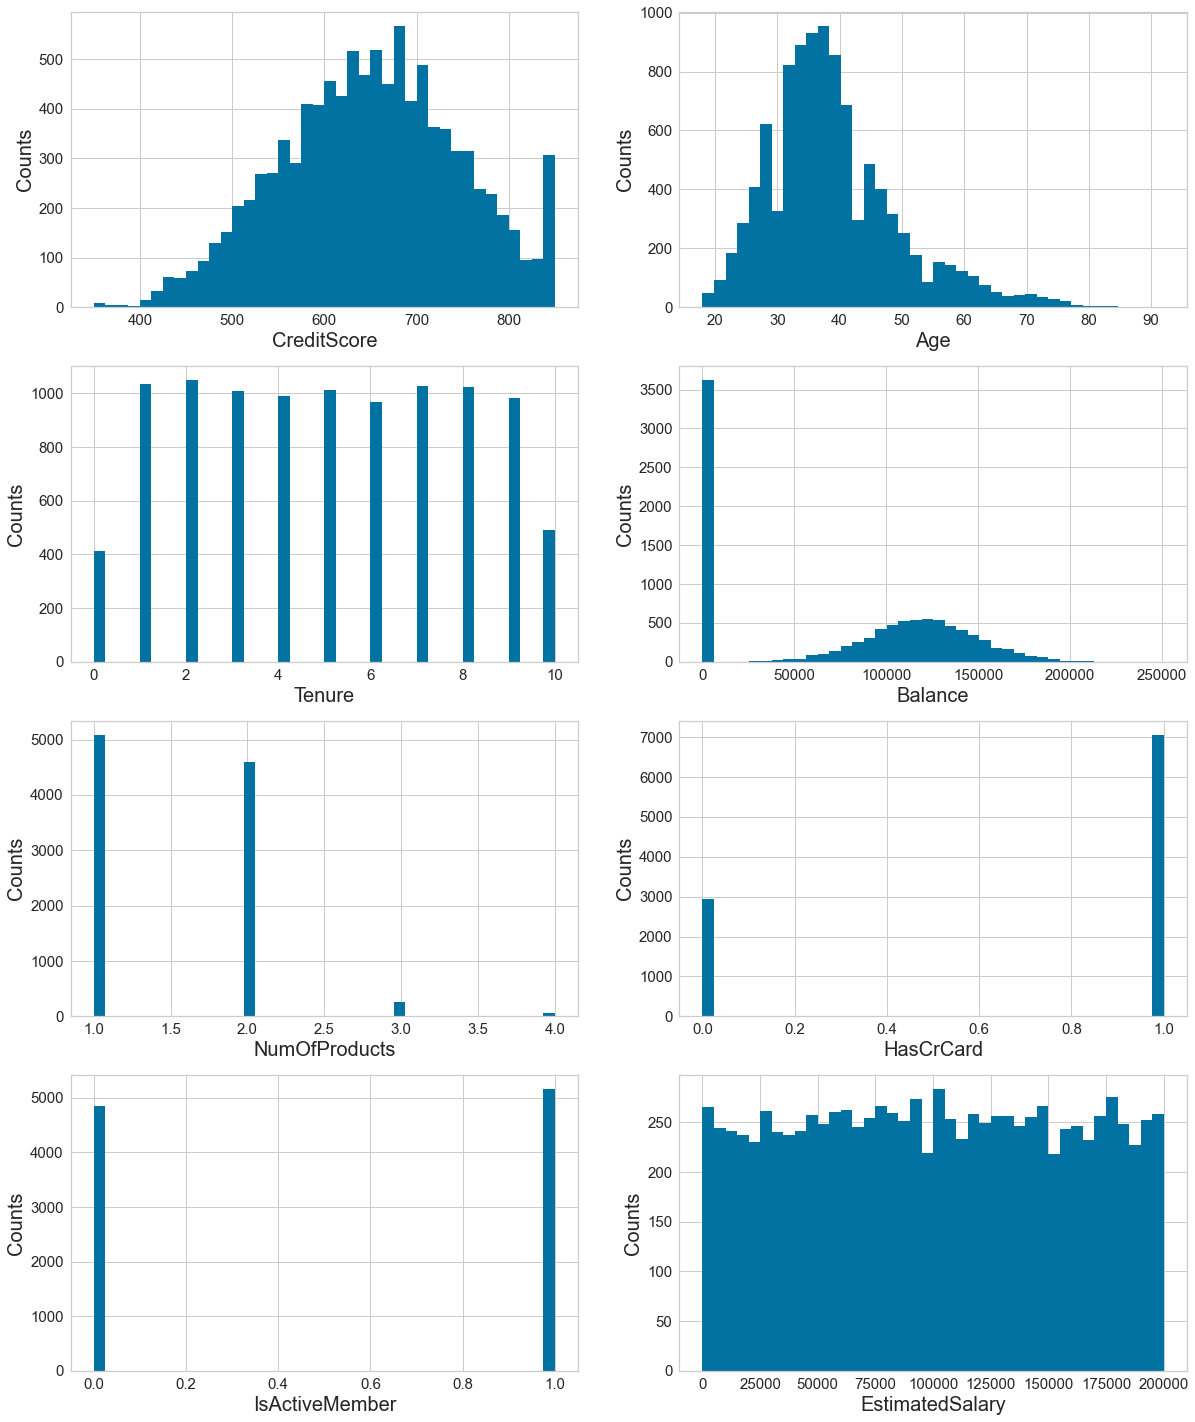

In [62]:
# make subplots of the means
fig, axes = plt.subplots(nrows = 4, ncols = 2)

# Specify the features of interest
num_features = ['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts', 
                'HasCrCard', 'IsActiveMember','EstimatedSalary']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts','Counts', 'Counts', 'Counts', 'Counts','Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df_churn[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

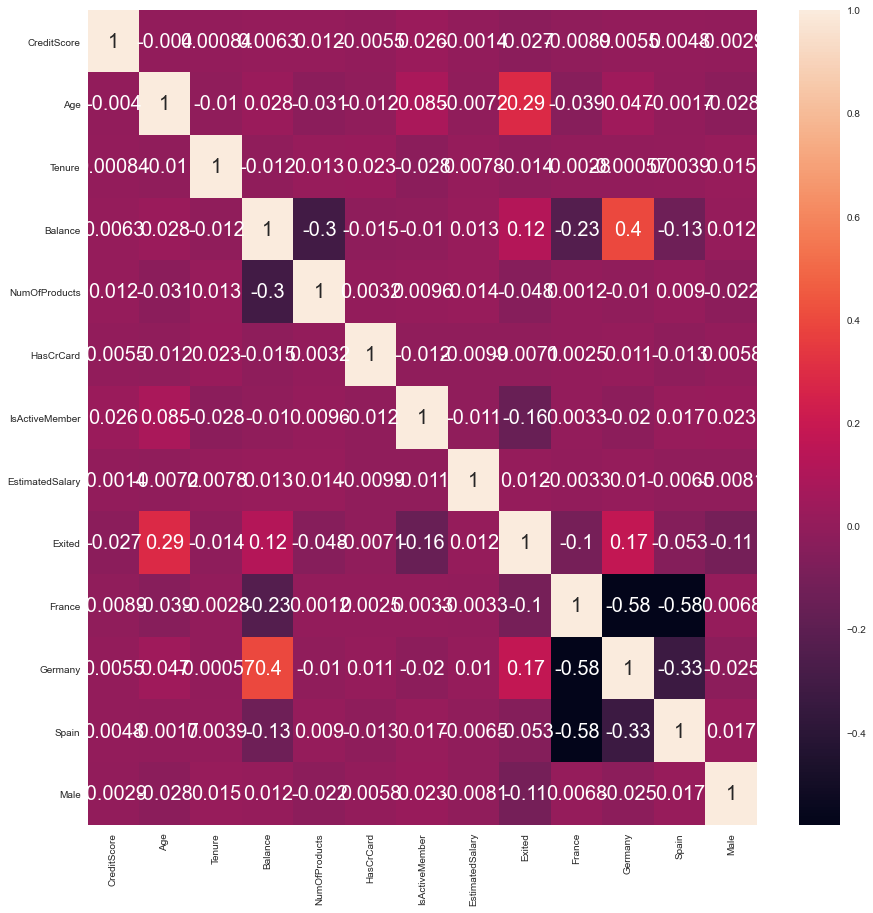

In [66]:
plt.subplots(figsize=(15,15))
sns.heatmap(df_churn.corr(), annot=True)
plt.show()

In [67]:
df_y = df_churn.Exited
df_churn.drop(['Exited'], axis=1, inplace=True)
df_X = df_churn


X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=10)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))
print(log_loss(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      2911
           1       0.05      0.36      0.09        89

    accuracy                           0.79      3000
   macro avg       0.51      0.58      0.48      3000
weighted avg       0.95      0.79      0.85      3000

[[2323  588]
 [  57   32]]

Accuracy Score for model1:  0.785
7.425852117256969


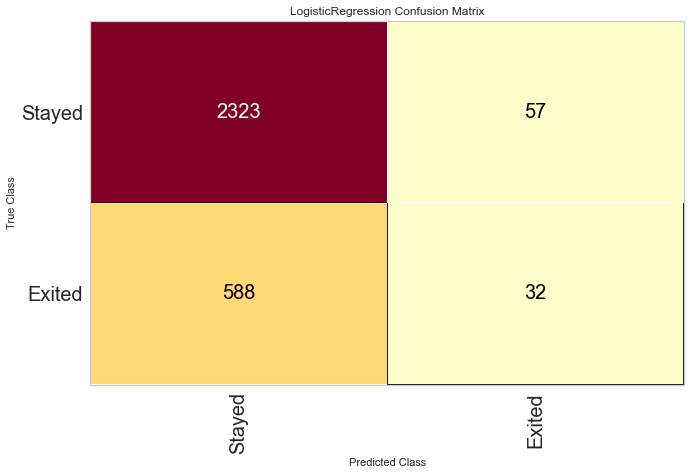

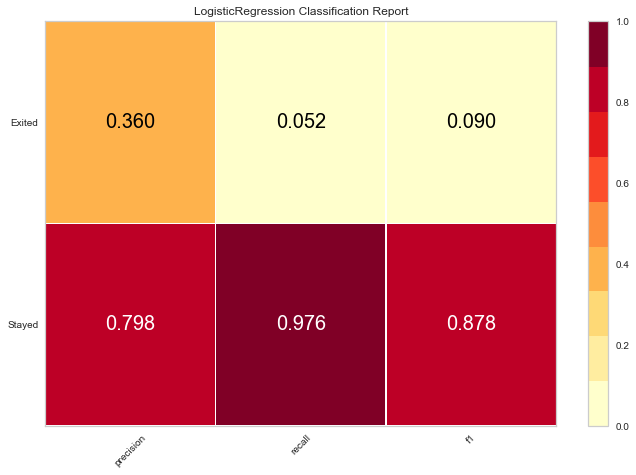

In [69]:
import yellowbrick
#Plot confusion matrix and classificatio report and ROC curves to 
#evaluate the data

from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

#The ConfusionMatrix visualizer taxes a model
classes = ['Stayed','Exited']
cm = ConfusionMatrix(model1, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model1, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# Ensemble Boosting

In [105]:
#importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
 
# importing machine learning models for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# importing voting classifer
from sklearn.ensemble import VotingClassifier

In [110]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=10)

In [111]:
# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = RandomForestClassifier()
model_4 = GradientBoostingClassifier()
model_5 = DecisionTreeClassifier()

 
# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('rf', model_3),('gbc',model_4)], voting='hard')
 
# training all the model on the train dataset
final_model.fit(X_train, y_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(X_test)
 

C:\Users\dan35\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:49:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dan35\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [114]:
# printing log loss between actual and predicted value
print(classification_report(pred_final, y_test))
print(confusion_matrix(pred_final, y_test))
print('\nAccuracy Score for Ensemble model: ', accuracy_score(pred_final,y_test))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      2706
           1       0.39      0.83      0.53       294

    accuracy                           0.86      3000
   macro avg       0.69      0.84      0.72      3000
weighted avg       0.92      0.86      0.88      3000

[[2329  377]
 [  51  243]]

Accuracy Score for Ensemble model:  0.8573333333333333


C:\Users\dan35\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\dan35\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


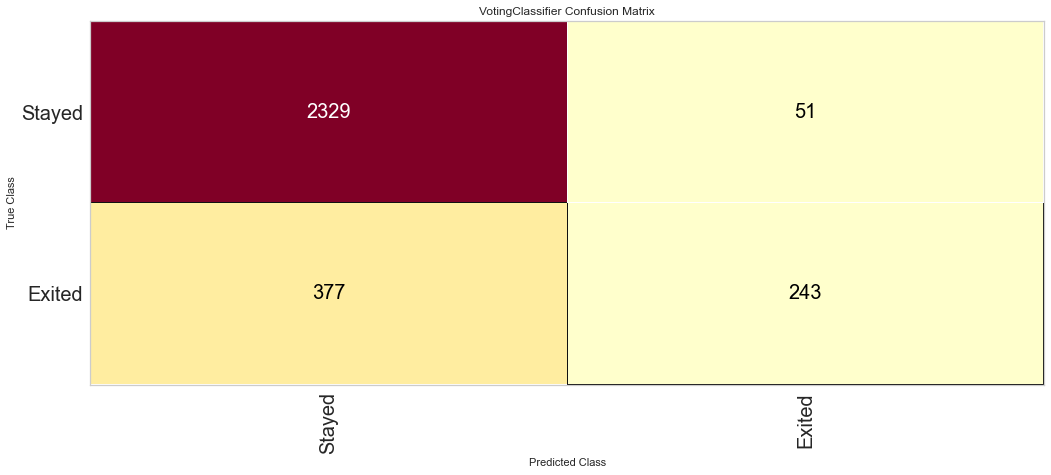

C:\Users\dan35\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\dan35\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


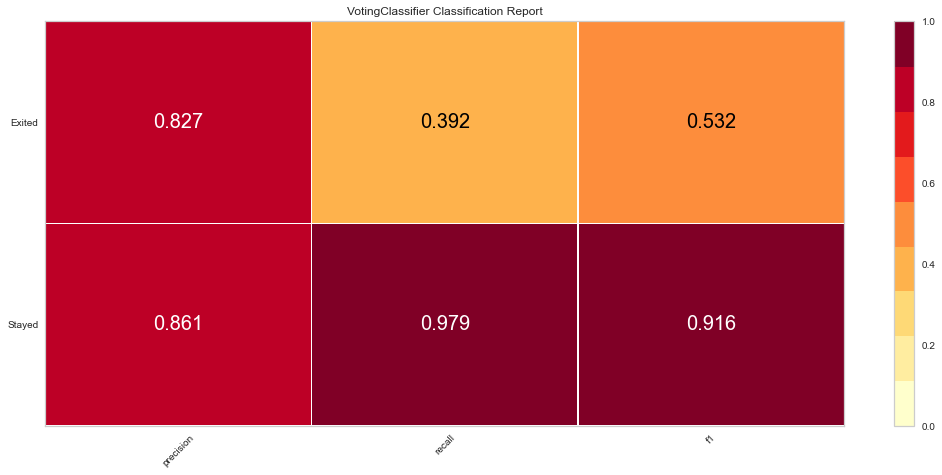

In [115]:
import yellowbrick
#Plot confusion matrix and classificatio report and ROC curves to 
#evaluate the data

from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

#The ConfusionMatrix visualizer taxes a model
classes = ['Stayed','Exited']
cm = ConfusionMatrix(final_model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(final_model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
#visualizer = ROCAUC(final_model)

#visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
#g = visualizer.poof()

In [79]:

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
  
seed = 8
kfold = model_selection.KFold(n_splits = 3,
                       random_state = seed)
  
# initialize the base classifier
base_cls = DecisionTreeClassifier()
  
# no. of base classifier
num_trees = 1000
  
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)
  
results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold)
print("accuracy :")
print(results.mean())

C:\Users\dan35\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


accuracy :
0.8535719939425794


C:\Users\dan35\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\dan35\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


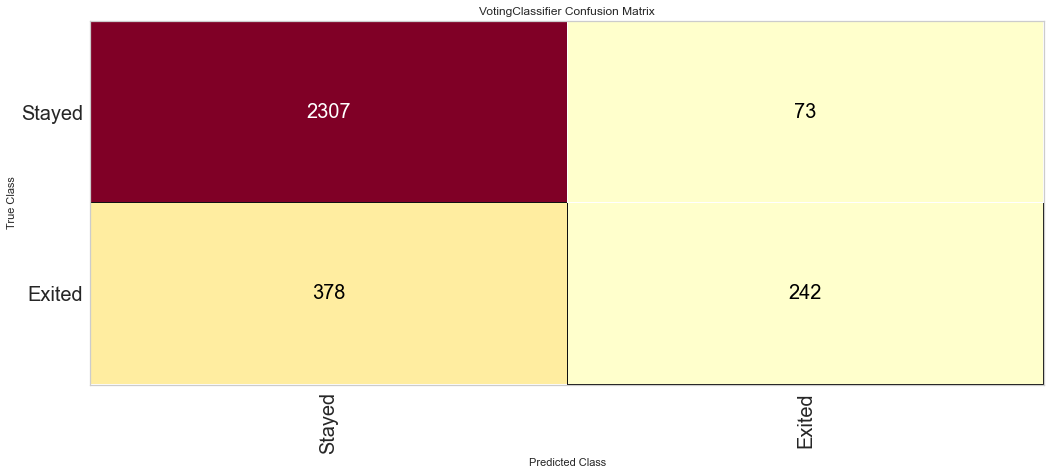

C:\Users\dan35\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\dan35\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


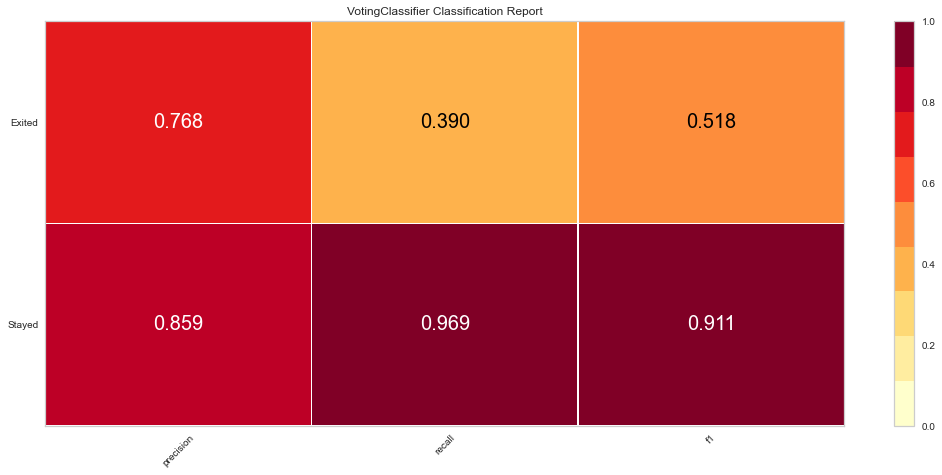

In [80]:
import yellowbrick
#Plot confusion matrix and classificatio report and ROC curves to 
#evaluate the data

from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

#The ConfusionMatrix visualizer taxes a model
classes = ['Stayed','Exited']
cm = ConfusionMatrix(final_model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(final_model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()